# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

ModuleNotFoundError: No module named 'keras.layers.core'

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

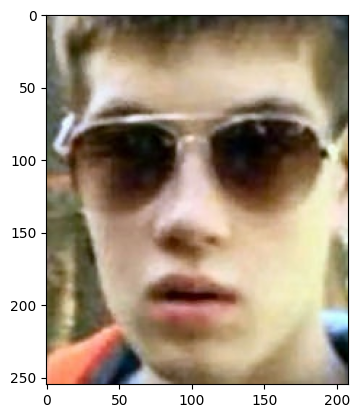

In [7]:
import matplotlib.image as mpimg
for ima in train_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

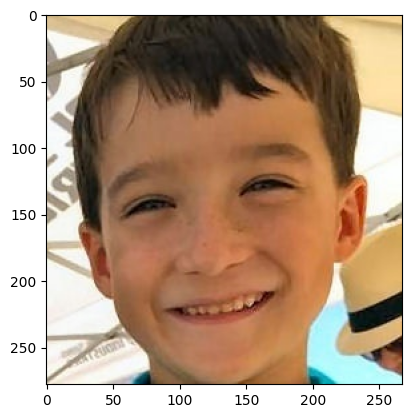

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image_path in list_of_images:
        # Read and resize the image
        img = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (224, 224), interpolation=cv2.INTER_CUBIC)
        
        if 'Non_Autistic' in image_path:
            y.append(0)
        else:
            y.append(1)
            
    return X, y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

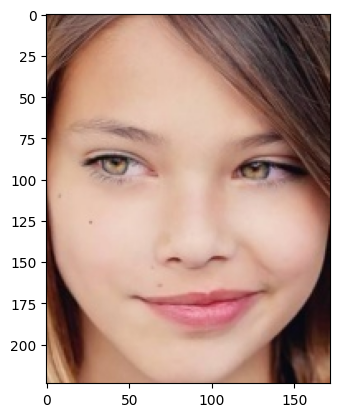

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Shape Of Data

In [13]:
# print("Shape of Train images:", X_train.shape)
# print("Shape of Train labels:", y_train.shape)
# print("Shape of validation images:", X_val.shape)
# print("Shape of validation labels:", y_val.shape)

# Preprocessing 

In [14]:
def preprocess_image(train_data, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    # Resize the image
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    # Normalize pixel values
    image = image / 255.0
    
    return image

X_train = [preprocess_image(train_data) for train_data in train_imgs]
X_test = [preprocess_image(test_data) for test_data in test_imgs]
X_val = [preprocess_image(val_data) for val_data in val_imgs]


# Converting Train & Val Data To np Array


In [15]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)


# Assuming y_train, y_val, and y_test are 1D arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# # Expand dimensions to create 4D arrays
# y_train_expanded = np.expand_dims(y_train, axis=0)
# y_val_expanded = np.expand_dims(y_val, axis=0)
# y_test_expanded = np.expand_dims(y_test, axis=0)


# Data Augmentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming X_train, X_val, and X_test are 4D arrays
# If they are 3D, you may need to add an extra dimension
# X_train = np.expand_dims(X_train, axis=0)
# X_val = np.expand_dims(X_val, axis=0)
# X_test = np.expand_dims(X_test, axis=0)

# Assuming y_train, y_val, and y_test are properly formatted labels

# Generating Larger DataSet - Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=4,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating ImageDataGenerator generators
batch_size = 32
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)
test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)


# Feature Extraction (vgg16,vgg19,mobilenet,xception,efficentnet)

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception, MobileNet, EfficientNetB0

# Define input shape for the models
input_shape = (224, 224, 3)  # Adjust according to the input size of your images

# Define input layer
input_layer = Input(shape=input_shape)

# Define the base models
base_models = []

# Instantiate and append each model to base_models list
for model in [Xception, MobileNet, EfficientNetB0]:
    base_model = model(input_tensor=input_layer, weights='imagenet', include_top=False, pooling='avg')
    base_models.append(base_model)

# Concatenate the outputs of the base models
concatenated_outputs = Concatenate()([base.output for base in base_models])

# Add a dense layer for classification
dense_layer = Dense(512, activation='relu')(concatenated_outputs)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dense_layer)  # Binary classification

# Create the combined model
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Freeze the base models
for base_model in base_models:
    base_model.trainable = False

# Compile the model
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
combined_model.summary()



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_3[0][0]

                                                                                                  
 block2a_se_expand (Conv2D)  (None, 1, 1, 96)             480       ['block2a_se_reduce[0][0]']   
                                                                                                  
 block2a_se_excite (Multipl  (None, 56, 56, 96)           0         ['block2a_activation[0][0]',  
 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 56, 56, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 56, 56, 24)           96        ['block2a_project_conv[0][0]']
 ormalizat

 block3a_se_expand (Conv2D)  (None, 1, 1, 144)            1008      ['block3a_se_reduce[0][0]']   
                                                                                                  
 block3a_se_excite (Multipl  (None, 28, 28, 144)          0         ['block3a_activation[0][0]',  
 y)                                                                  'block3a_se_expand[0][0]']   
                                                                                                  
 block3a_project_conv (Conv  (None, 28, 28, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 28, 28, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
          

                                                                                                  
 block4a_se_excite (Multipl  (None, 14, 14, 240)          0         ['block4a_activation[0][0]',  
 y)                                                                  'block4a_se_expand[0][0]']   
                                                                                                  
 block4a_project_conv (Conv  (None, 14, 14, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 14, 14, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_e

 y)                                                                  'block4c_se_expand[0][0]']   
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block4c_project_conv (Conv  (None, 14, 14, 80)           38400     ['block4c_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]']     
 on)                                                                                              
          

 Conv2D)                                                                                          
                                                                                                  
 block5a_se_expand (Conv2D)  (None, 1, 1, 480)            10080     ['block5a_se_reduce[0][0]']   
                                                                                                  
 block3_sepconv1_bn (BatchN  (None, 55, 55, 256)          1024      ['block3_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block5a_se_excite (Multipl  (None, 14, 14, 480)          0         ['block5a_activation[0][0]',  
 y)                                                                  'block5a_se_expand[0][0]']   
                                                                                                  
 block3_se

                                                                                                  
 batch_normalization_14 (Ba  (None, 14, 14, 728)          2912      ['conv2d_14[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 block5b_se_expand (Conv2D)  (None, 1, 1, 672)            19488     ['block5b_se_reduce[0][0]']   
                                                                                                  
 add_38 (Add)                (None, 14, 14, 728)          0         ['block4_pool[0][0]',         
                                                                     'batch_normalization_14[0][0]
                                                                    ']                            
                                                                                                  
 block5b_s

 block6_sepconv1 (Separable  (None, 14, 14, 728)          536536    ['block6_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['conv1_bn[0][0]']            
                                                                                                  
 block5c_se_reshape (Reshap  (None, 1, 1, 672)            0         ['block5c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6_sepconv1_bn (BatchN  (None, 14, 14, 728)          2912      ['block6_sepconv1[0][0]']     
 ormalization)                                                                                    
          

 Conv2D)                                                                                          
                                                                                                  
 conv_dw_2_relu (ReLU)       (None, 56, 56, 64)           0         ['conv_dw_2_bn[0][0]']        
                                                                                                  
 block6a_expand_activation   (None, 14, 14, 672)          0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 14, 14, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv_pw_2

                                                                                                  
 conv_pad_4 (ZeroPadding2D)  (None, 57, 57, 128)          0         ['conv_pw_3_relu[0][0]']      
                                                                                                  
 block6a_project_conv (Conv  (None, 7, 7, 192)            129024    ['block6a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block8_sepconv1_bn (BatchN  (None, 14, 14, 728)          2912      ['block8_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv_dw_4 (DepthwiseConv2D  (None, 28, 28, 128)          1152      ['conv_pad_4[0][0]']          
 )        

 block9_sepconv1 (Separable  (None, 14, 14, 728)          536536    ['block9_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 conv_pw_5 (Conv2D)          (None, 28, 28, 256)          65536     ['conv_dw_5_relu[0][0]']      
                                                                                                  
 block6b_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6b_se_reshape[0][0]']  
                                                                                                  
 block9_sepconv1_bn (BatchN  (None, 14, 14, 728)          2912      ['block9_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv_pw_5

                                                                                                  
 conv_dw_7 (DepthwiseConv2D  (None, 14, 14, 512)          4608      ['conv_pw_6_relu[0][0]']      
 )                                                                                                
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, 7, 7, 1152)           28800     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block10_sepconv1_bn (Batch  (None, 14, 14, 728)          2912      ['block10_sepconv1[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 conv_dw_7

                                                                                                  
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)          2048      ['conv_pw_8[0][0]']           
 zation)                                                                                          
                                                                                                  
 block6c_drop (Dropout)      (None, 7, 7, 192)            0         ['block6c_project_bn[0][0]']  
                                                                                                  
 block11_sepconv1_bn (Batch  (None, 14, 14, 728)          2912      ['block11_sepconv1[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)          0         ['conv_pw_8_bn[0][0]']        
          

 block12_sepconv1 (Separabl  (None, 14, 14, 728)          536536    ['block12_sepconv1_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 conv_dw_10_relu (ReLU)      (None, 14, 14, 512)          0         ['conv_dw_10_bn[0][0]']       
                                                                                                  
 block6d_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6d_se_reshape[0][0]']  
                                                                                                  
 block12_sepconv1_bn (Batch  (None, 14, 14, 728)          2912      ['block12_sepconv1[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 conv_pw_1

                                                                                                  
 conv_pad_12 (ZeroPadding2D  (None, 15, 15, 512)          0         ['conv_pw_11_relu[0][0]']     
 )                                                                                                
                                                                                                  
 block7a_dwconv (DepthwiseC  (None, 7, 7, 1152)           10368     ['block7a_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block13_sepconv1_bn (Batch  (None, 14, 14, 728)          2912      ['block13_sepconv1[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 conv_dw_1

 conv_dw_13_relu (ReLU)      (None, 7, 7, 1024)           0         ['conv_dw_13_bn[0][0]']       
                                                                                                  
 block7a_project_bn (BatchN  (None, 7, 7, 320)            1280      ['block7a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block14_sepconv2 (Separabl  (None, 7, 7, 2048)           3159552   ['block14_sepconv1_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 conv_pw_13 (Conv2D)         (None, 7, 7, 1024)           1048576   ['conv_dw_13_relu[0][0]']     
                                                                                                  
 top_conv 

In [21]:
# Train the model
epochs = 5  # Adjust the number of epochs as needed

# Assuming you have already defined and compiled your combined_model

history = combined_model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7320\3676241167.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = combined_model.fit_generator(


Epoch 1/5


80/80 [==============================] - 163s 2s/step - loss: 0.7495 - accuracy: 0.5118 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/5
80/80 [==============================] - 153s 2s/step - loss: 0.7029 - accuracy: 0.5035 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 3/5
80/80 [==============================] - 153s 2s/step - loss: 0.6973 - accuracy: 0.5110 - val_loss: 0.6870 - val_accuracy: 0.5300
Epoch 4/5
80/80 [==============================] - 152s 2s/step - loss: 0.6977 - accuracy: 0.5126 - val_loss: 0.7072 - val_accuracy: 0.5000
Epoch 5/5
80/80 [==============================] - 152s 2s/step - loss: 0.6938 - accuracy: 0.5122 - val_loss: 0.6868 - val_accuracy: 0.5200


In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = combined_model.evaluate_generator(test_generator, steps=len(test_generator))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7320\3780420960.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = combined_model.evaluate_generator(test_generator, steps=len(test_generator))


Test Loss: 0.691040575504303
Test Accuracy: 0.49000000953674316


# Shap

In [23]:
!pip install shap

C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train2/Autistic-2.jpg


PartitionExplainer explainer: 2it [01:17, 77.61s/it]               


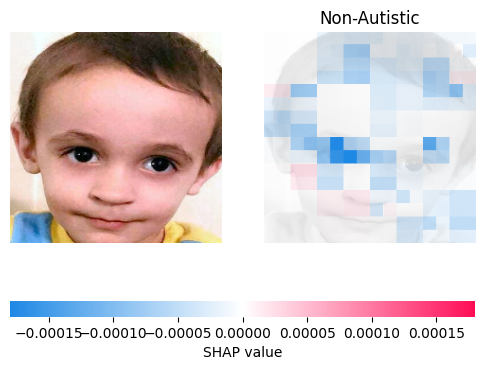

In [30]:
import cv2
import numpy as np
import shap
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
import os

img_path = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train2/Autistic-2.jpg"
print(img_path)
img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
img = cv2.resize(img, (224, 224))  # Resize the image to match the expected input shape
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = np.array(img)

import json

def f(X):
    tmp = X.copy()
    return combined_model(tmp)

class_names = ['Non-Autistic','Autistic']

# Define the input shape for the image masker
input_shape = (224, 224, 3)

# Define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", input_shape)

# By default the Partition explainer is used for all partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

shap_values = explainer(
    img.reshape(1, 224, 224, 3),  # Reshape the image to match the expected input shape
    max_evals=500,
    outputs=shap.Explanation.argsort.flip[:1]
)
shap.image_plot(shap_values)


# Memory Release

In [25]:
import gc

In [26]:
del X_train_features, X_val_features, X_train, X_val
gc.collect()  

65112

# Training And Val Loss

In [42]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

## Classification Report

In [45]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

## Confusion Matrix 

In [46]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

In [47]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")